
#                        **SET UP**










In [1]:
import tensorflow as tf
tf .__version__

'2.3.0'

In [2]:
# connect gitlab to drive to be a place to store data
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
pwd

'/content'

In [4]:
cd /content/drive/My Drive/deep_learning_exercise

/content/drive/My Drive/deep_learning_exercise


In [5]:
ls

'Bản sao của Bài tập phần 3.ipynb'         convolution   tokenizers.ipynb
'build road signal classifiations.ipynb'   note.docx     traffic-signs-data.zip
 cats_and_dogs_filtered/                   projet/       train.p
 cats_and_dogs_filtered.zip                test.p        valid.p


#**Downlad data set**

In [6]:
link_data = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [7]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1ffe0c00f0671d57b2590fdbcac8a0f6ae9b9bea2dfeb23fbf96787989f101fc
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [8]:
import wget

In [9]:
wget.download(link_data)

'traffic-signs-data (1).zip'

In [11]:
data = "./" # Unzip in the current directory

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [12]:
# tạo ra đường dẫn của các file extracted 
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data +"test.p"


In [13]:
import pickle

In [14]:
with open(train_link,mode='rb') as f:
  train_set = pickle.load(f)
with open(valid_link,mode='rb') as f:
  valid_set = pickle.load(f)
with open(test_link,mode='rb') as f:
  test_set = pickle.load(f)  


In [15]:
train_set

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [17]:
trainX=train_set["features"]
trainy=train_set["labels"]

In [18]:
trainX.shape,trainy.shape # 34799 photos 32*32 with 3 bytes colors 

((34799, 32, 32, 3), (34799,))

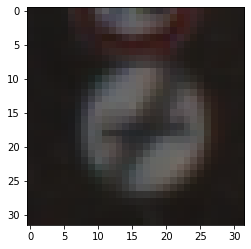

In [19]:
# visualize a photo

import matplotlib.pyplot as plt

plt.imshow(trainX[0]) 

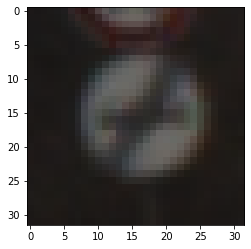

In [20]:
plt.imshow(trainX[1]) 

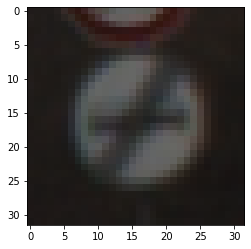

In [21]:
plt.imshow(trainX[10])

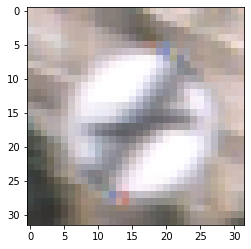

In [22]:
plt.imshow(trainX[50])

In [23]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [24]:
classNames[trainy[50]]

'End of no passing'


 Consider that the first 5 images in dataset is same, this lead to lack of the generation of training model so we need to shuffle the data. 

In [25]:
from  sklearn.utils import shuffle  

trainX,trainy = shuffle(trainX,trainy)

(<matplotlib.image.AxesImage at 0x7f8e1f0a9e48>,
 'No passing for vehicles over 3.5 metric tons')

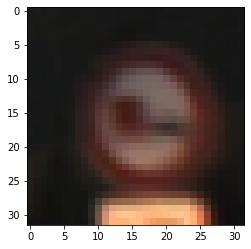

In [26]:
plt.imshow(trainX[0]) , classNames[trainy[0]]

In [27]:
validX=valid_set["features"]
validy=valid_set["labels"]

testX=test_set["features"]
testy=test_set["labels"]


### Normalization data

In [29]:
trainX = trainX.astype("float")/255.0
validX = validX . astype("float")/255.0
testX = testX.astype("float")/255.0



In [30]:
# 255
# 1
trainX[0]

array([[[0.00036909, 0.00039985, 0.00038447],
        [0.00039985, 0.00041522, 0.00039985],
        [0.00038447, 0.00038447, 0.00035371],
        ...,
        [0.00033833, 0.00033833, 0.00033833],
        [0.00035371, 0.00035371, 0.00035371],
        [0.00035371, 0.00035371, 0.00035371]],

       [[0.00039985, 0.00041522, 0.00038447],
        [0.00038447, 0.00039985, 0.00035371],
        [0.00039985, 0.00039985, 0.00035371],
        ...,
        [0.00033833, 0.00033833, 0.00033833],
        [0.00033833, 0.00033833, 0.00035371],
        [0.00035371, 0.00035371, 0.00035371]],

       [[0.00039985, 0.00041522, 0.00038447],
        [0.00038447, 0.00039985, 0.00035371],
        [0.00038447, 0.00039985, 0.00035371],
        ...,
        [0.00033833, 0.00032295, 0.00032295],
        [0.00032295, 0.00032295, 0.00032295],
        [0.00035371, 0.00035371, 0.00035371]],

       ...,

       [[0.0004306 , 0.00038447, 0.00030757],
        [0.00036909, 0.00032295, 0.00026144],
        [0.00030757, 0

In [38]:
from sklearn.preprocessing import LabelBinarizer # this API made each label to one hot vector

In [39]:
lb = LabelBinarizer()

In [40]:
trainy = lb.fit_transform(trainy)
validy = lb.fit_transform(validy)


In [41]:
valid_set["labels"][0]


41

In [42]:
validy[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      dtype=int64)

#**Building the model**

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [46]:
# khởi tạo model bằng API Sequential
model = Sequential()

In [47]:
width = 32
height = 32
Classes = 43

In [48]:
shape = (width, height, 3 ) # shape cua bua anh

In [49]:
# layer Conv2d

# 32 lớp kernel kích thước 3*3, padding = "same" để giữ lại data của ảnh ở phía cạnh của ảnh đó 


model.add(Conv2D(32 , (3,3), padding="same", input_shape=shape))

In [50]:

model.add(Activation("relu"))  # layer Activation

In [51]:
model.add(BatchNormalization())    # layer BatchNormalization để chuẩn hóa phân bố của data như input ban đầu 

In [52]:
model.add(Conv2D(32 , (3,3),padding="same"))

In [53]:
model.add(Activation("relu"))  # layer Activation

In [54]:
model.add(BatchNormalization())    # layer BatchNormalization để chuẩn hóa phân bố của data như input ban đầu 

In [55]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [57]:
model.add(Activation("relu"))

In [58]:
model.add(BatchNormalization())

In [59]:
model.add(Conv2D(64, (3, 3), padding="same"))


In [60]:

model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # duỗi thành vector 4096*1
model.add(Dense(512)) # duỗi thành vector 512*1
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dense(Classes))
model.add(Activation("softmax")) # duỗi thành 43 hợp vs y 



In [61]:
model.summary() # kiểm trả model của mạng

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

In [65]:
# augmentation data
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)


In [66]:
epochs = 10 
batch_size = 64

In [67]:
learning_rate = 0.01

In [68]:
opt = SGD(learning_rate=learning_rate, momentum=0.9) # stochatic gradient descends

In [69]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [71]:
print("Start training")
H =  model.fit_generator(aug.flow(trainX, trainy, batch_size=batch_size), validation_data=(validX, validy), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
543/543 [==============================] - 27s 50ms/step - loss: 2.5880 - accuracy: 0.2724 - val_loss: 33.1415 - val_accuracy: 0.0660
Epoch 2/10
543/543 [==============================] - 27s 49ms/step - loss: 1.4502 - accuracy: 0.5355 - val_loss: 4.7671 - val_accuracy: 0.1299
Epoch 3/10
543/543 [==============================] - 27s 50ms/step - loss: 0.8423 - accuracy: 0.7239 - val_loss: 5.2434 - val_accuracy: 0.2268
Epoch 4/10
543/543 [==============================] - 26s 48ms/step - loss: 0.5317 - accuracy: 0.8234 - val_loss: 6.6276 - val_accuracy: 0.1544
Epoch 5/10
543/543 [==============================] - 26s 49ms/step - loss: 0.3735 - accuracy: 0.8779 - val_loss: 9.8251 - val_accuracy: 0.2014
Epoch 6/10
543/543 [==============================] - 27s 50ms/step - loss: 0.2869 - accuracy: 0.9048 - val_loss: 2.4041 - val_accuracy: 0.4825
Epoch 7/10
543/543 [========================

No handles with labels found to put in legend.


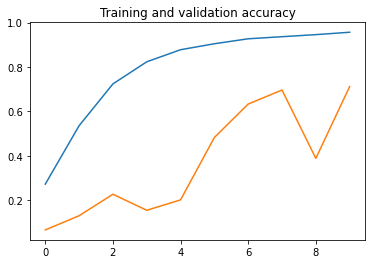

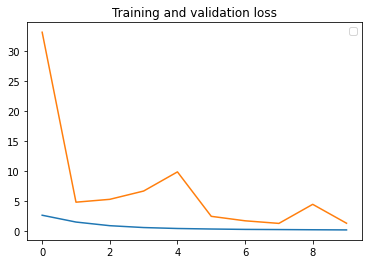

In [74]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = H.history[     'accuracy' ]
val_acc  = H.history[ 'val_accuracy' ]
loss     = H.history[    'loss' ]
val_loss = H.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )
plt.legend()

#**Predict , verifiy the model by  test_set**

In [75]:
testX[60:61].shape

(1, 32, 32, 3)

In [76]:
result = model.predict(testX[60:61])

In [77]:
result

array([[4.4378542e-08, 4.2637826e-06, 4.6659745e-05, 1.1097166e-04,
        1.9355293e-06, 8.4116509e-05, 2.1620259e-05, 2.4394050e-05,
        1.0096456e-04, 3.1090181e-07, 2.1538792e-08, 7.9877987e-05,
        3.7112848e-03, 8.0271348e-05, 4.6063366e-08, 8.8481784e-06,
        2.8948061e-10, 4.0281922e-08, 2.3147622e-05, 3.5010608e-09,
        7.3390816e-05, 1.9673166e-06, 9.8151249e-06, 2.6378784e-06,
        2.6725439e-04, 4.6653670e-04, 6.9127185e-05, 7.3801866e-06,
        1.5893151e-04, 1.9487429e-04, 2.5342964e-03, 9.5646974e-06,
        2.1375481e-04, 9.1495417e-04, 8.4997207e-04, 8.7690549e-03,
        1.3744864e-01, 1.1378093e-02, 7.4116063e-01, 7.7294727e-04,
        9.0386949e-02, 2.2244731e-06, 8.1698536e-06]], dtype=float32)

In [78]:
import numpy as np



In [79]:
final=np.argmax(result) #tìm index của giá trị có xác xuất lớn nhất
final

38

In [80]:
final = classNames[final]

In [81]:
test_set["features"][60].shape

(32, 32, 3)

(<matplotlib.image.AxesImage at 0x7f8dc367a8d0>, 'Keep right')

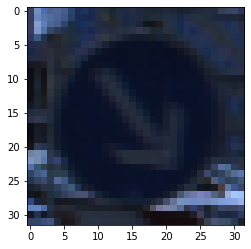

In [82]:
plt.imshow(test_set["features"][60]),final